In [1]:
import sys
sys.path.append("..")

In [2]:
from ethicml.algorithms.inprocess import LR, SVM, Majority, ZafarAccuracy, ZafarFairness, Kamiran, Agarwal
from ethicml.metrics import Accuracy, AbsCV, ProbPos, TPR, TNR, F1, BalancedAccuracy
from ethicml.preprocessing import BalancedTestSplit
from ethicml.evaluators import evaluate_models_async, load_results
from ethicml.data import Adult, load_data
from ethicml.visualisation import plot_results
from ethicml.utility import Results

In [3]:
from ethicml_models import GPyT, GPyTDemPar, GPyTEqOdds, TPRRatio

In [ ]:
results = await evaluate_models_async(
    datasets=[
        Adult(binarize_nationality=True),
        Adult("Race-Binary", binarize_nationality=True),
    ],
    inprocess_models=[
        LR(),
#             SVM(),
#             Majority(),
#             ZafarAccuracy(),
#             ZafarFairness(),
#             Kamiran(),
#             Agarwal("DP"),
#             Agarwal("EqOd"),
        GPyT(s_as_input=False, flags=dict(gpu=0)),

        GPyTDemPar(s_as_input=False, target_mode=GPyTDemPar.MIN, flags=dict(gpu=0)),
        GPyTDemPar(s_as_input=False, target_mode=GPyTDemPar.MEAN, flags=dict(gpu=0)),
        GPyTDemPar(s_as_input=False, target_mode=GPyTDemPar.MAX, flags=dict(gpu=0)),

#         GPyTDemPar(s_as_input=False, target_acceptance=0.1, flags=dict(gpu='1')),
#         GPyTDemPar(s_as_input=False, target_acceptance=0.2, flags=dict(gpu='0')),
#         GPyTDemPar(s_as_input=False, target_acceptance=0.3, flags=dict(gpu='1')),
#         GPyTDemPar(s_as_input=False, target_acceptance=0.4, flags=dict(gpu='0')),
#         GPyTDemPar(s_as_input=False, target_acceptance=0.5, flags=dict(gpu='1')),
#         GPyTDemPar(s_as_input=False, target_acceptance=0.6, flags=dict(gpu='0')),
#         GPyTDemPar(s_as_input=False, target_acceptance=0.7, flags=dict(gpu='1')),
#         GPyTDemPar(s_as_input=False, target_acceptance=0.8, flags=dict(gpu='0')),
#         GPyTDemPar(s_as_input=False, target_acceptance=0.9, flags=dict(gpu='1')),
    ],
    metrics=[Accuracy(), AbsCV(), F1(), TPRRatio(), ProbPos(), TPR(), TNR(), BalancedAccuracy()],
    per_sens_metrics=[Accuracy(), ProbPos(), TPR(), TNR()],
    repeats=10,
    delete_prev=False,
    splitter=BalancedTestSplit(),
    topic="dp_gp_balanced_test_10repeats",
    max_parallel=1,
)

synchronous algorithms...


100%|██████████| 10/10 [00:02<00:00,  3.93it/s, model=Logistic Regression, C=1.0, dataset=Adult Sex, binary nationality - Train (9)]

asynchronous algorithms...



 65%|██████▌   | 13/20 [1:31:33<49:17, 422.54s/it, model=GPyT_dem_par_in_False_tar_min, dataset=Adult Sex, binary nationality - Train (3), worker_id=0]

In [10]:
results

NameError: name 'results' is not defined

In [6]:
results = load_results("Adult Sex", "no_transform", topic="baselines_balanced_test")

In [ ]:
(fig, plot), = plot_results(results, "Accuracy", "prob_pos_sex_Male_0/sex_Male_1", ptype="cross")
fig

In [ ]:
(fig, plot), = plot_results(results, "Accuracy", "prob_pos_race_White_0/race_White_1", ptype="cross")
fig

In [ ]:
(fig, plot), = plot_results(results, "Balanced Accuracy", "prob_pos_sex_Male_0/sex_Male_1", ptype="cross")
fig

In [ ]:
(fig, plot), = plot_results(results, "Balanced Accuracy", "prob_pos_race_White_0/race_White_1", ptype="cross")
fig

In [ ]:
(fig, plot), = plot_results(results, "F1", "prob_pos_sex_Male_0/sex_Male_1", ptype="cross")
fig

In [ ]:
(fig, plot), = plot_results(results, "Accuracy", "TPR_sex_Male_0/sex_Male_1", ptype="cross")
fig

In [ ]:
(fig, plot), = plot_results(
    Results(results.data.query("model != 'Majority'")),
    "prob_pos_sex_Male_0", "prob_pos_sex_Male_1", ptype="cross")

plot.set_ylim((0.05, 0.35))
fig

In [ ]:
(fig, plot), = plot_results(
    Results(results.data.query("model != 'Majority'")),
    "TPR", "TNR", ptype="cross")

# plot.set_ylim((0.05, 0.35))
fig

In [ ]:
(fig, plot), = plot_results(
    Results(results.data.query("model != 'Majority'")),
    "TNR_sex_Male_0", "TNR_sex_Male_1", ptype="cross")

# plot.set_ylim((0.05, 0.35))
fig

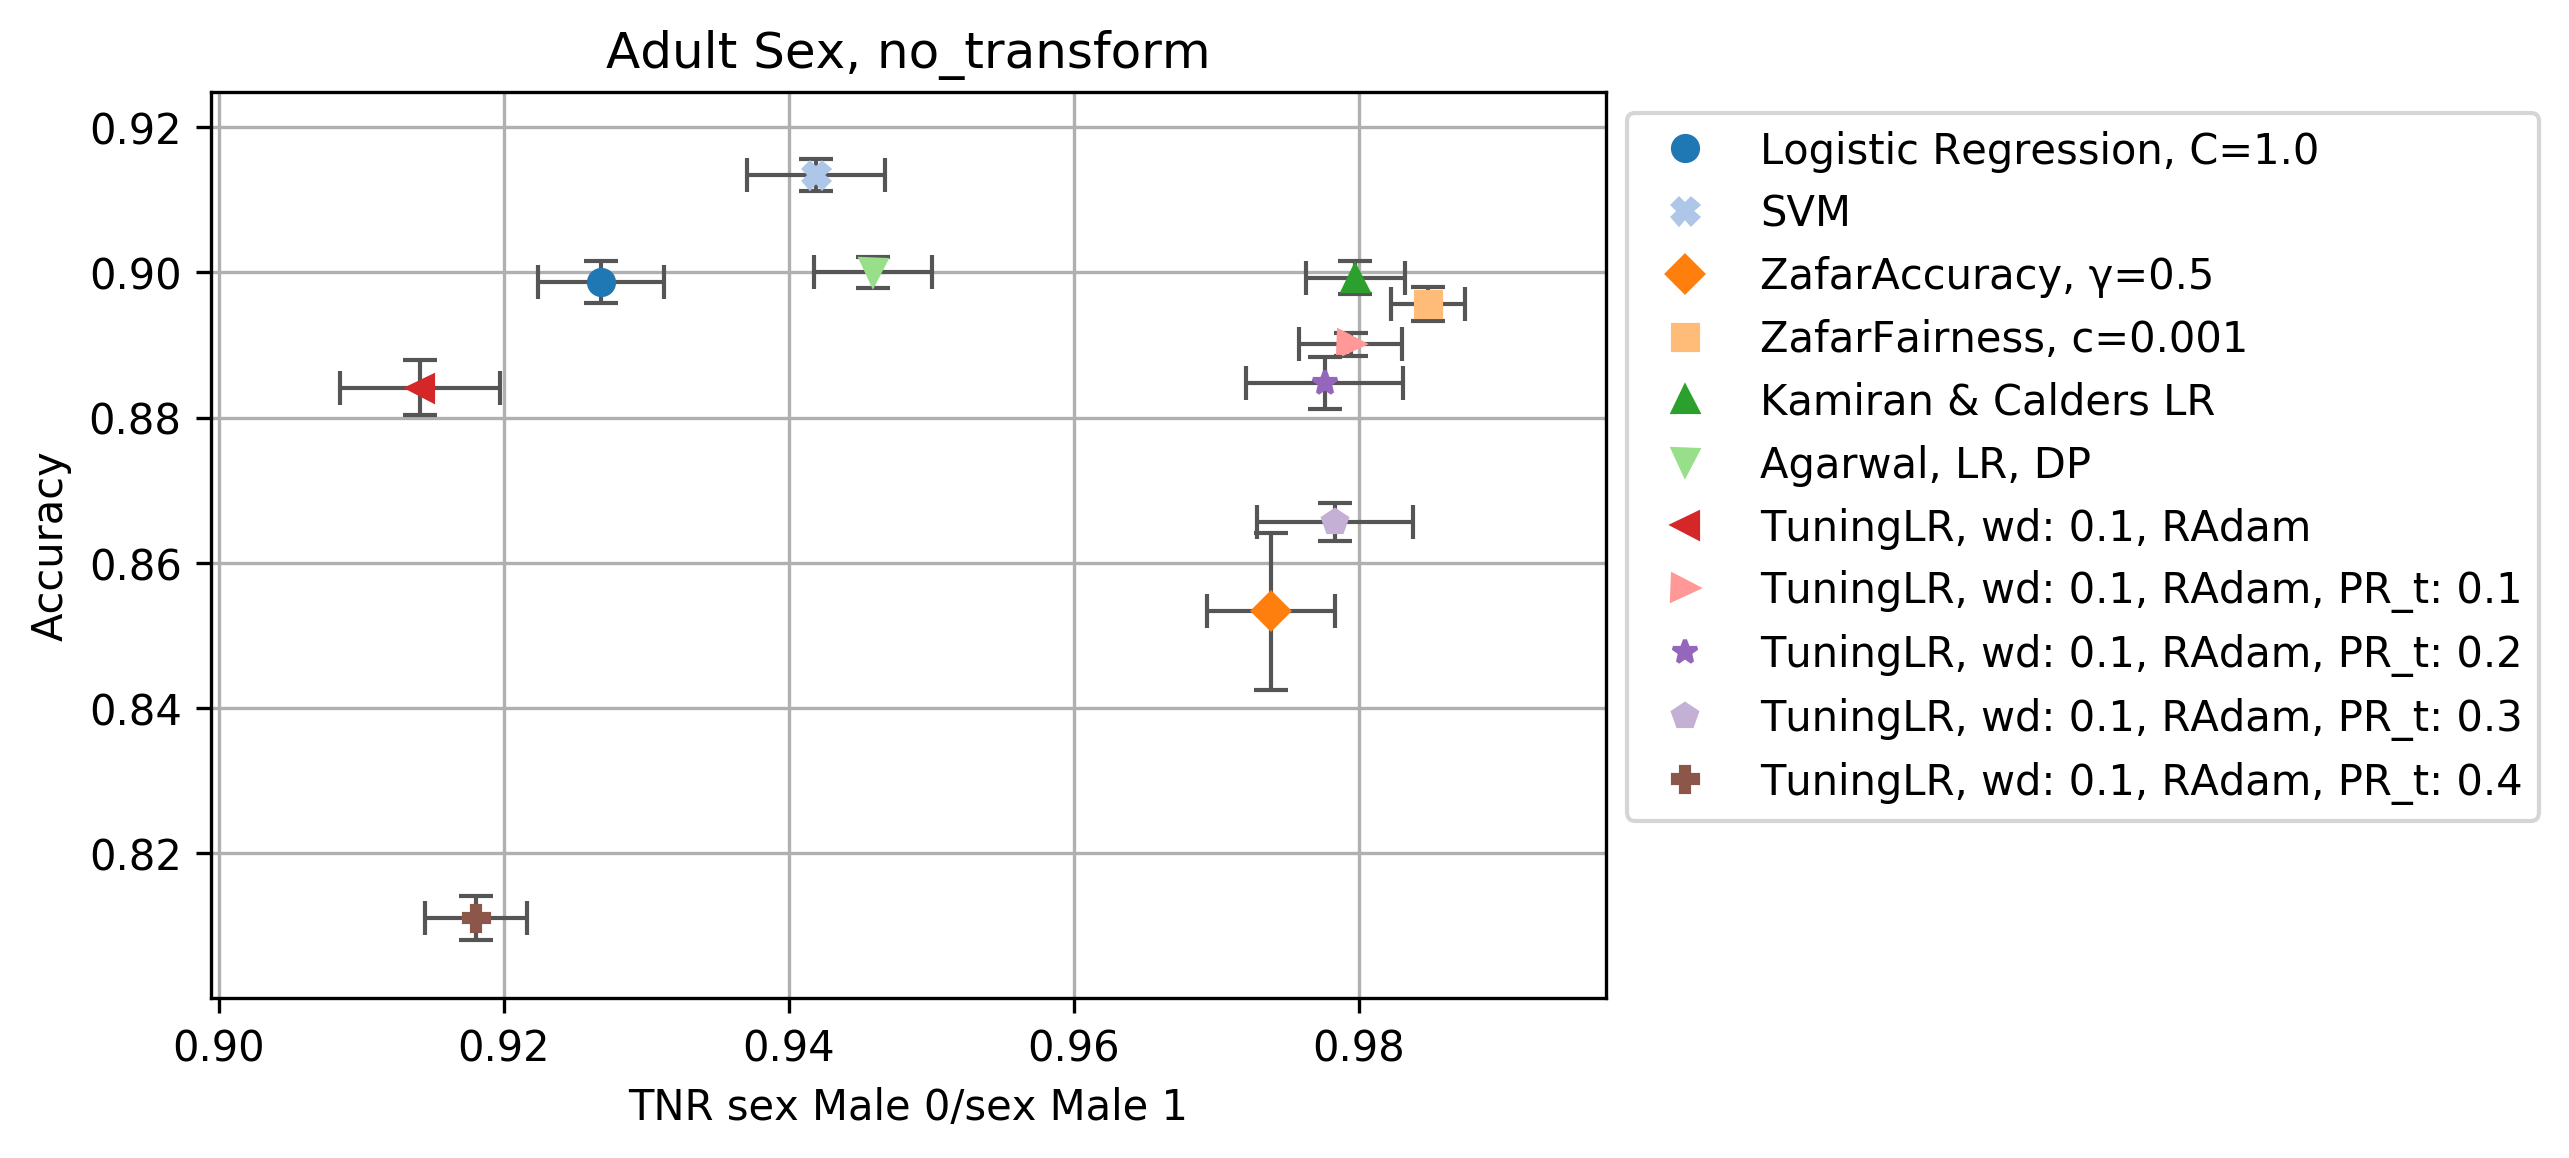

In [11]:
results_temp = Results(results.data.query("model != 'TuningLR, wd: 0.1, RAdam, PR_t: 0.5' & model != 'Majority'"))
(fig, plot), = plot_results(results_temp, "Accuracy", "TNR_sex_Male_0/sex_Male_1", ptype="cross")
fig

In [21]:
results_temp.data

Accuracy  \
dataset   transform    model                               split_id             
Adult Sex no_transform Logistic Regression, C=1.0          4         0.898775   
                       SVM                                 4         0.909323   
                       ZafarAccuracy, γ=0.5                4         0.862368   
                       ZafarFairness, c=0.001              4         0.900476   
                       Kamiran & Calders LR                4         0.899626   
...                                                                       ...   
                       TuningLR, wd: 0.1, RAdam            4         0.878530   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.1 4         0.887547   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.2 4         0.877339   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.3 4         0.859986   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.4 4         0.804866   

                                                                     Accuracy_sex_Male_0  \
dataset   transform    model                               split_id                        
Adult Sex no_transform Logistic Regression, C=1.0          4                    0.921742   
                       SVM                                 4                    0.927526   
                       ZafarAccuracy, γ=0.5                4                    0.862198   
                       ZafarFairness, c=0.001              4                    0.902007   
                       Kamiran & Calders LR                4                    0.910854   
...                                                                                  ...   
                       TuningLR, wd: 0.1, RAdam            4                    0.920041   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.1 4                    0.900987   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.2 4                    0.896563   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.3 4                    0.876489   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.4 4                    0.838721   

                                                                     Accuracy_sex_Male_0-sex_Male_1  \
dataset   transform    model                               split_id                                   
Adult Sex no_transform Logistic Regression, C=1.0          4                               0.045934   
                       SVM                                 4                               0.036407   
                       ZafarAccuracy, γ=0.5                4                               0.000340   
                       ZafarFairness, c=0.001              4                               0.003062   
                       Kamiran & Calders LR                4                               0.022457   
...                                                                                             ...   
                       TuningLR, wd: 0.1, RAdam            4                               0.083021   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.1 4                               0.026880   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.2 4                               0.038448   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.3 4                               0.033004   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.4 4                               0.067710   

                                                                     Accuracy_sex_Male_0/sex_Male_1  \
dataset   transform    model                               split_id                                   
Adult Sex no_transform Logistic Regression, C=1.0          4                               0.950166   
                       SVM                                 4                               0.960748   
                       ZafarAccuracy, γ=0.5                4      

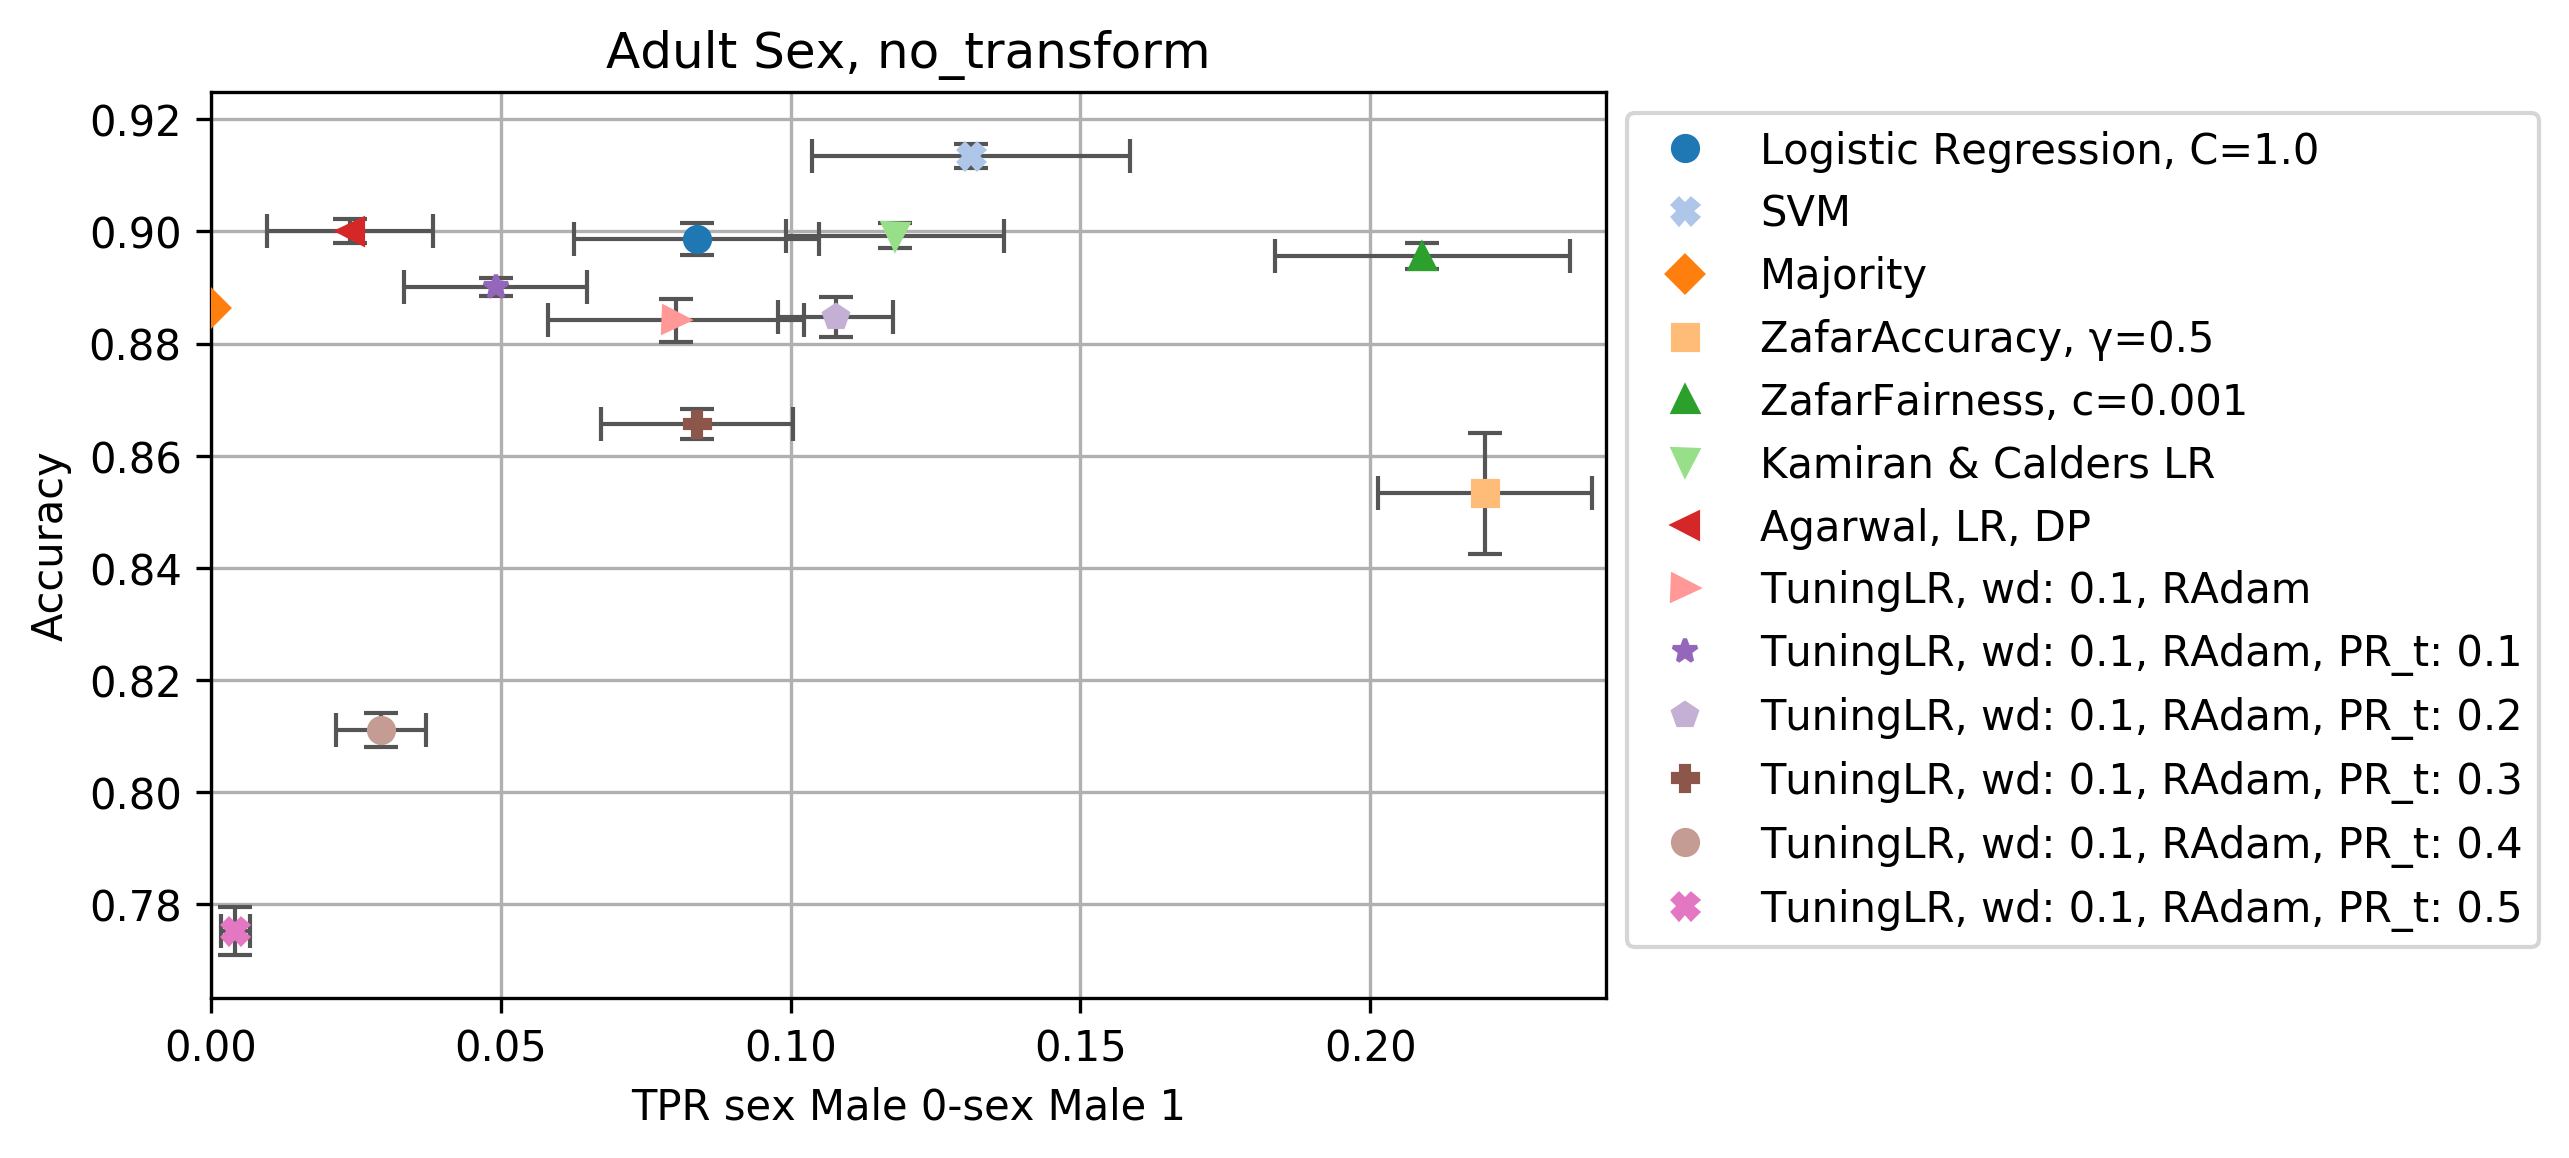

In [12]:
(fig, plot), = plot_results(results, "Accuracy", "TPR_sex_Male_0-sex_Male_1", ptype="cross")
fig

In [5]:
import pandas as pd

In [7]:
df_sex = pd.read_csv("results/dp_gp_balanced_test_10repeats_Adult Sex, binary nationality_no_transform.csv")
df_race = pd.read_csv("results/dp_gp_balanced_test_10repeats_Adult Race-Binary, binary nationality_no_transform.csv")

In [14]:
df_race.groupby("model").agg(["mean", "std"])[["prob_pos_race_White_0/race_White_1", "Accuracy"]]

prob_pos_race_White_0/race_White_1            \
                                                            mean       std   
model                                                                        
GPyT_dem_par_in_False                                   0.864597  0.066448   
GPyT_dem_par_in_False_tar_max                           0.832027  0.056777   
GPyT_dem_par_in_False_tar_min                           0.876612  0.063806   
GPyT_in_False                                           0.801548  0.074591   
Logistic Regression, C=1.0                              0.837678  0.072776   

                               Accuracy            
                                   mean       std  
model                                              
GPyT_dem_par_in_False          0.888489  0.005812  
GPyT_dem_par_in_False_tar_max  0.886155  0.005762  
GPyT_dem_par_in_False_tar_min  0.891060  0.005118  
GPyT_in_False                  0.887658  0.004207  
Logistic Regression, C=1.0     0.883109  0.007478

In [15]:
df_sex.groupby("model").agg(["mean", "std"])[["prob_pos_sex_Male_0/sex_Male_1", "Accuracy"]]

prob_pos_sex_Male_0/sex_Male_1            \
                                                        mean       std   
model                                                                    
GPyT_dem_par_in_False                               0.867136  0.093224   
GPyT_dem_par_in_False_tar_max                       0.937670  0.037323   
GPyT_dem_par_in_False_tar_min                       0.798070  0.136580   
GPyT_in_False                                       0.544699  0.051607   
Logistic Regression, C=1.0                          0.515716  0.025884   

                               Accuracy            
                                   mean       std  
model                                              
GPyT_dem_par_in_False          0.901837  0.006946  
GPyT_dem_par_in_False_tar_max  0.884008  0.007835  
GPyT_dem_par_in_False_tar_min  0.912793  0.009274  
GPyT_in_False                  0.900068  0.005847  
Logistic Regression, C=1.0     0.898146  0.003894